## Homework 3 - Welcome to the world of variable stars!

Modified from (Viviana Acquaviva (2023)) License: BSD-3-clause

#### Data description

The data we use for this homework are about stars. Our features are the so-called "colors", which give an indication of whether a star emits more blue, green, yellow, or red light. We are trying to predict whether a star is a special type of star called a RR-Lyrae variable star. So our target values will be yes/no (1/0 in the language of numpy arrays).

1\. Load the data for features and target from the appropriate files and save them as numpy arrays. (note: the default delimiter won't work, these are comma separated values!)

In [1]:
import numpy as np

features = np.loadtxt("RRLyrae_features_small.txt", delimiter = ",")
target = np.loadtxt('RRLyrae_labels_small.txt')

2\. Answer the following questions:

Is this a classification or regression problem?

 **- classification**

Is this supervised or unsupervised learning?
    
**- supervised**

How many instances are in this data set? 

**- please see cell below**

How many features?

**- please see cell below**

How many RR Lyrae stars (i.e., examples of the positive class) are in the data set?

**- please see cell below**

What would be the accuracy of a classifier that classifies all objects in the data set as non-RR Lyrae?

**- please see cell below**


In [2]:
from sklearn import metrics

print('number of instances: {}'.format(np.shape(features)[0]))
print('number of features: {}'.format(np.shape(features)[1]))
print('RR Lyrae stars: {}'.format(int(np.sum(target))))

accuracy = metrics.accuracy_score(target, np.zeros(len(target)))
print('accuracy score on lazy classifier(all objects are non-RR Lyrae): {:.3f}'.format(accuracy))

number of instances: 2483
number of features: 4
RR Lyrae stars: 483
accuracy score on lazy classifier(all objects are non-RR Lyrae): 0.805


3\. Use a Decision Tree Classifier, and implement k-fold cross validation algorithm.

In [3]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
import sklearn

model =  DecisionTreeClassifier()
cv = StratifiedKFold()

4\. Report the scores, and calculate the mean and standard deviation of the scores vector. 

In [4]:
from sklearn.model_selection import cross_validate

metrics = cross_validate(model, features, target, cv=cv)
print('test score: mean = {:.3f}, std = {:.4f}'.format(metrics['test_score'].mean() , metrics['test_score'].std()))

test score: mean = 0.964, std = 0.0119


5\. As in lab 5-6, compute the confusion matrix for your model. To generate the predictions, you can use the "cross_val_predict" function. Please write your own code before using any scikit learn builtin functions, but you can use ConfusionMatrixDisplay to visualize.

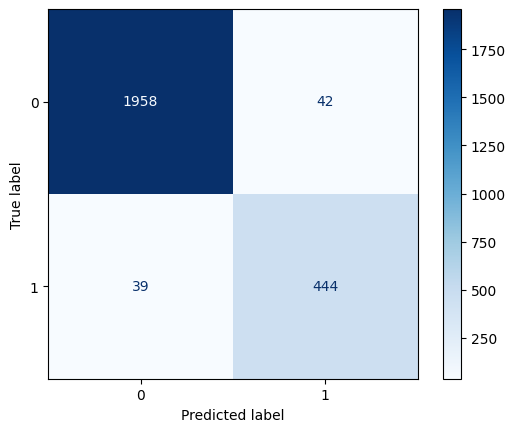

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

def gen_conf_matrix(y_true, y_pred):
    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    true_negative = np.sum((y_true == 0) & (y_pred == 0))
    false_positive = np.sum((y_true == 0) & (y_pred == 1))
    false_negative = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[true_negative, false_positive], [false_negative, true_positive]])

ypred = cross_val_predict(model, features, target, cv=cv)
conf_matrix = gen_conf_matrix(target, ypred)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

6\. Based on the confusion matrix, how many true positive, true negative, false positive, false negative instances do you have?

In [6]:
tn = conf_matrix[0][0]
tp = conf_matrix[1][1]
fn = conf_matrix[1][0]
fp = conf_matrix[0][1]

print('true  negative: {}'.format(tn))
print('true  positive: {}'.format(tp))
print('false negative: {}'.format(fn))
print('false positive: {}'.format(fp))

true  negative: 1958
true  positive: 444
false negative: 39
false positive: 42


7\. Calculate accuracy, precision and recall. Plese write out your steps and do not use built-in functions. 

In [7]:
#accuracy = correctly classified values (tp + tn) / total number of predictions 
accuracy = (tp + tn) / (np.sum(conf_matrix))
print('accuracy: {:.2f}'.format(accuracy))

#Precision = TP ÷ (TP + FP)
precision = tp / (tp + fp)
print('precision: {:.2f}'.format(precision))

#Recall = TP ÷ (TP + FN)
recall = tp/ (tp + fn)
print('recall: {:.2f}'.format(recall))

accuracy: 0.97
precision: 0.91
recall: 0.92


8\. Which evaluation metric is used by the cross validation score in 4.? [To answer this question, you might need to check out the description of the function]. Given the distribution of classes in your data set, do you see a possible issue?

**- accuracy is the evaluation metric. Given the distribution of our data set is unbalanced (a lot of target values of zero) -> accuracy is not a great measure as a lazy classifier can also present a high accuracy**

9\. To compare performance for now, let's use the F1 score, a weighted average of precision and recall.

F1 = 2 * (precision * recall) / (precision + recall)

Find out how to use the f1 score (instead of accuracy) as an optional argument of the cross_validate function and report the mean and standard deviation of the scores associated to this evaluation metric.


In [8]:
F1 = 2 * precision * recall / (precision + recall)
print('F1: {:.3f}'.format(F1))

metrics = cross_validate(model, features, target, cv=cv, scoring = 'f1')
print('F1 test score: mean = {:.3f}, std = {:.4f}'.format(metrics['test_score'].mean() , metrics['test_score'].std()))

F1: 0.916
F1 test score: mean = 0.916, std = 0.0262


10\. It is now time to look at some diagnostics. Use the cross_validate function with 'return_train_score = True'. Compare the f1 train and test scores obtained by your model. Based on this result, do you think your algorithm suffers from high variance or high bias and why?

In [9]:
metrics = cross_validate(model, features, target, cv=cv, scoring = 'f1', return_train_score = True)

print('F1 train score: mean = {:.3f}, std = {:.4f}'.format(metrics['train_score'].mean() , metrics['train_score'].std()))
print('F1 test score: mean = {:.3f}, std = {:.4f}'.format(metrics['test_score'].mean() , metrics['test_score'].std()))

F1 train score: mean = 1.000, std = 0.0000
F1 test score: mean = 0.916, std = 0.0245


**- considering the train score is perfect, this model would suffer from high-variance as it performs perfectly on the training data but does not generalize well to the test data**

11\. Finally, we can look at learning curves as in lab 5-6.  Based on what you see in the plot, do you think getting more training data would help? Justify your answer.



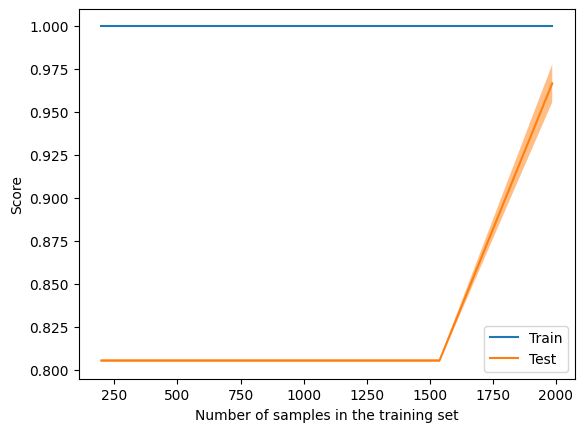

In [10]:
sklearn.model_selection.LearningCurveDisplay.from_estimator(model, features, target, cv=cv)
plt.show()

**- we can see a sharp incline in test scores as the number of samples in the training set increase. Thus a larger training set would likely lead to higher test scores and decrease the variance**